I will do a short analysis based on restaurant invoices. The goal is to draw a correlation between the male vs. female and tip vs. total bil. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [3]:
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
# With this code we can figure out how many days per week is the restaurant open.
len(tips_df['day'].unique())

4

In [5]:
# Number of days when there are more bills in the restaurant.
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

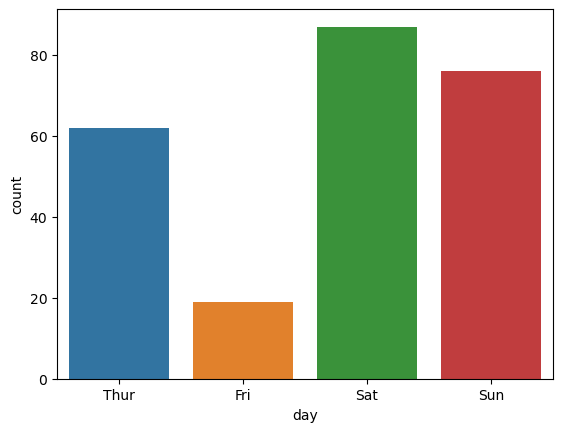

In [6]:
sns.countplot(data = tips_df, x = 'day', order = ['Thur', 'Fri', 'Sat', 'Sun'])

<AxesSubplot:xlabel='sex', ylabel='count'>

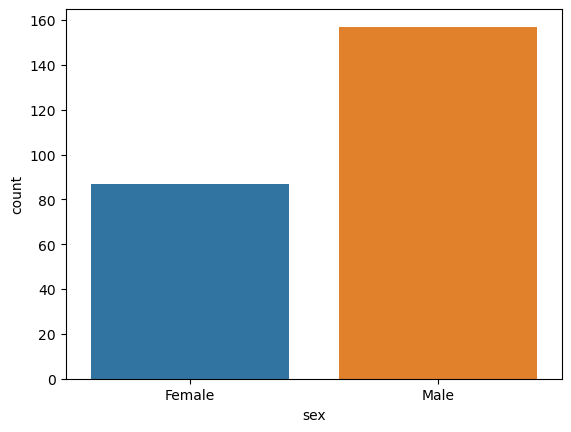

In [7]:
sns.countplot(data = tips_df, x = 'sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

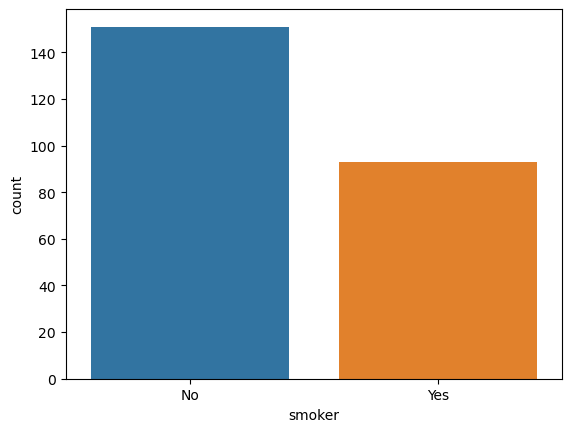

In [8]:
sns.countplot(data = tips_df, x = 'smoker')

<AxesSubplot:xlabel='time', ylabel='count'>

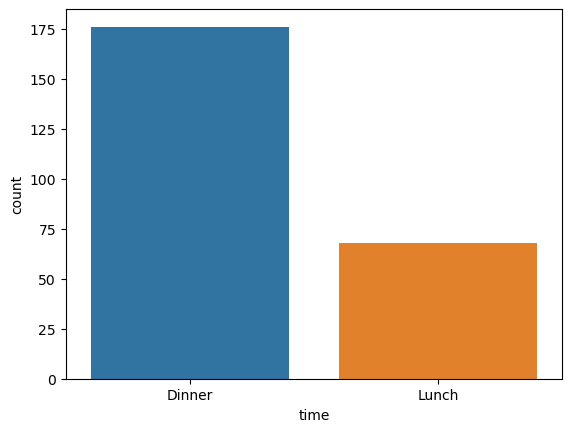

In [9]:
sns.countplot(data = tips_df, x = 'time')

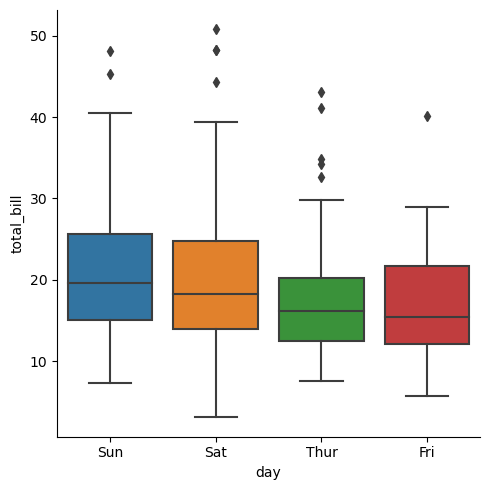

In [10]:
# Showing the distribution of total_bill based on a given category.
sns.catplot(data = tips_df, x = 'day', y = 'total_bill', kind = "box")

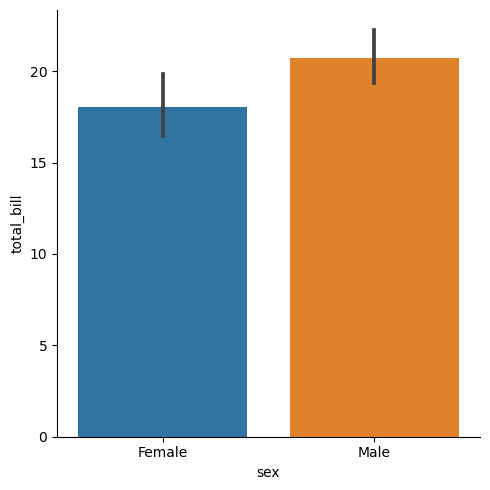

In [11]:
sns.catplot(data = tips_df, x = 'sex', y = 'total_bill', kind = "bar")

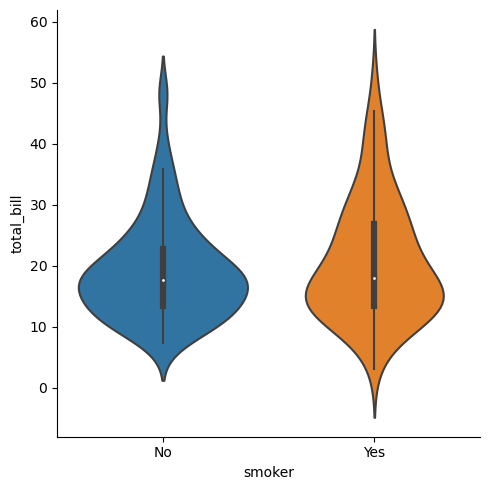

In [12]:
sns.catplot(data = tips_df, x = 'smoker', y = 'total_bill', kind = "violin")

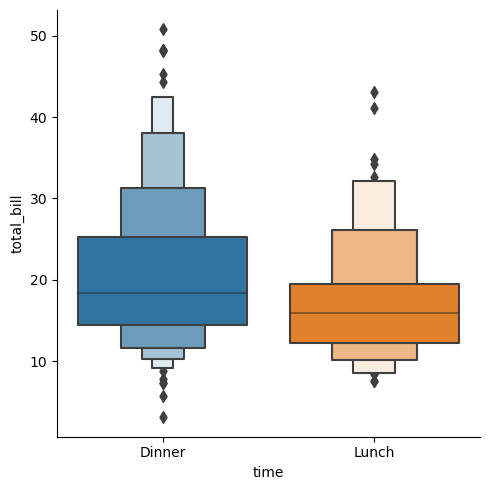

In [13]:
sns.catplot(data = tips_df, x = 'time', y = 'total_bill', kind = "boxen")

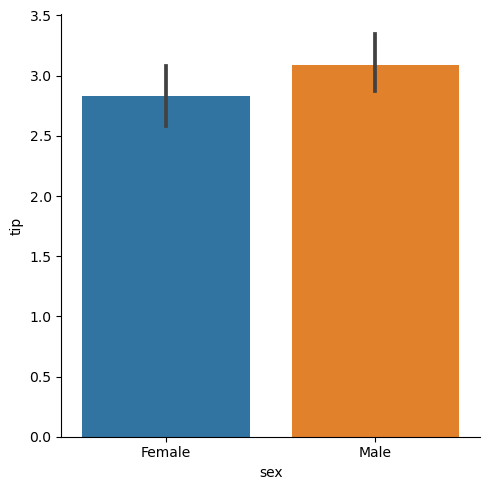

In [14]:
sns.catplot(data = tips_df, x = 'sex', y = 'tip', kind = "bar")

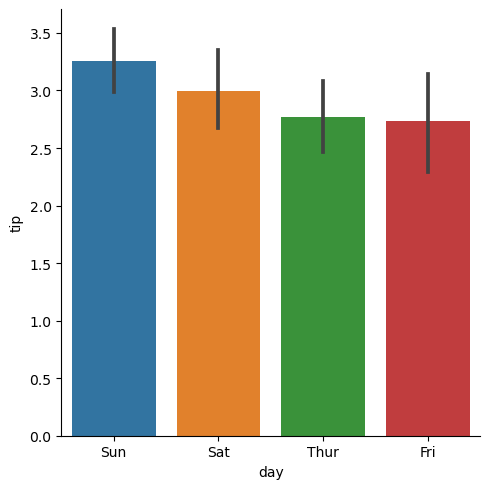

In [15]:
sns.catplot(data = tips_df, x = 'day', y = 'tip', kind = "bar")

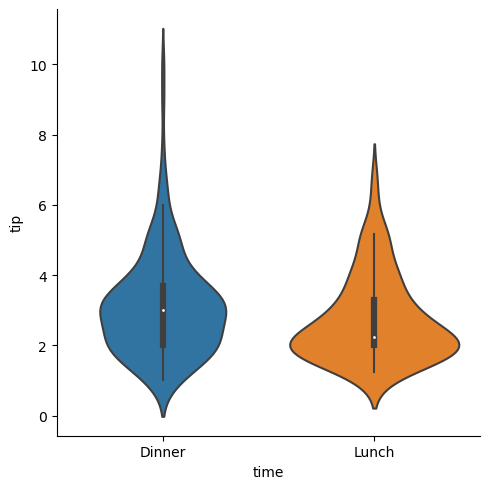

In [16]:
sns.catplot(data = tips_df, x = 'time', y = 'tip', kind = "violin")

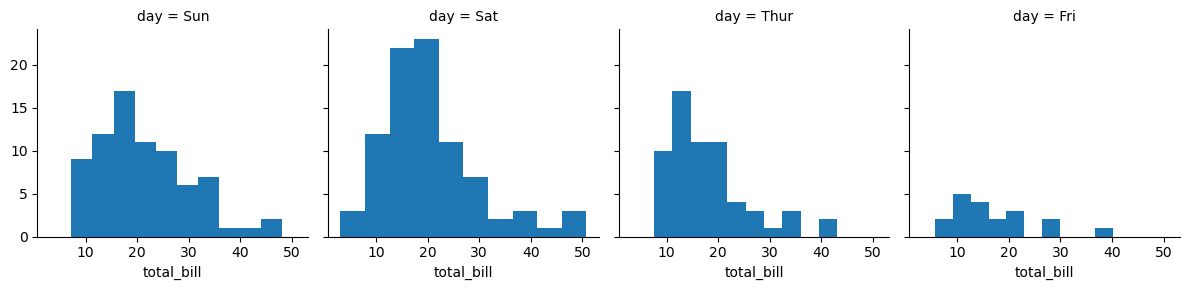

In [19]:
g = sns.FacetGrid(tips_df, col = "day")
g.map(plt.hist, "total_bill")

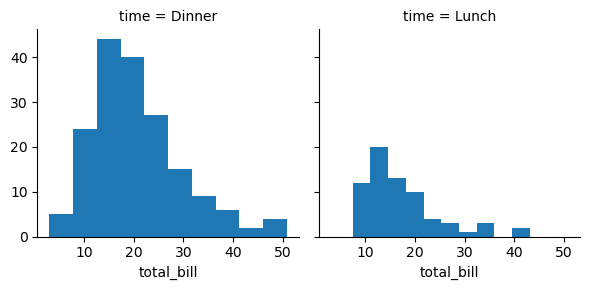

In [20]:
g = sns.FacetGrid(tips_df, col = "time")
g.map(plt.hist, "total_bill")

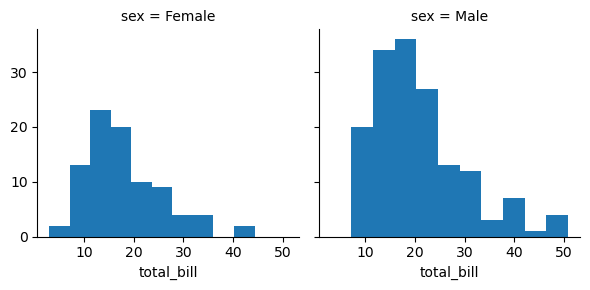

In [21]:
g = sns.FacetGrid(tips_df, col = "sex")
g.map(plt.hist, "total_bill")

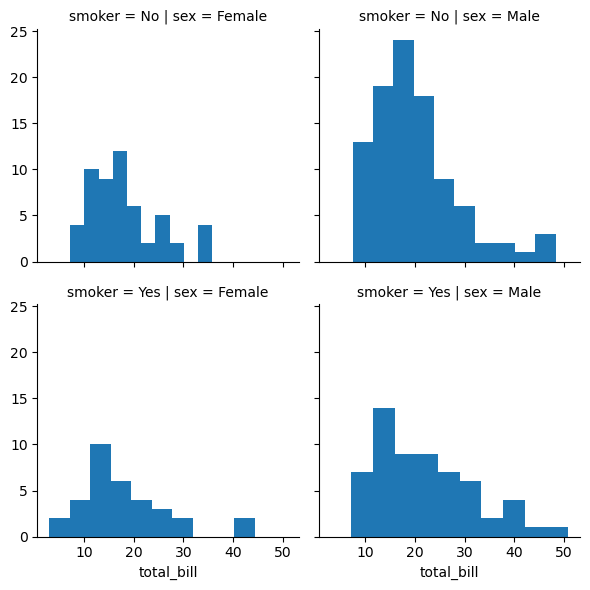

In [22]:
#Adding a second parameter to FacetGrid.
g = sns.FacetGrid(tips_df, col = "sex", row = "smoker")
g.map(plt.hist, "total_bill")

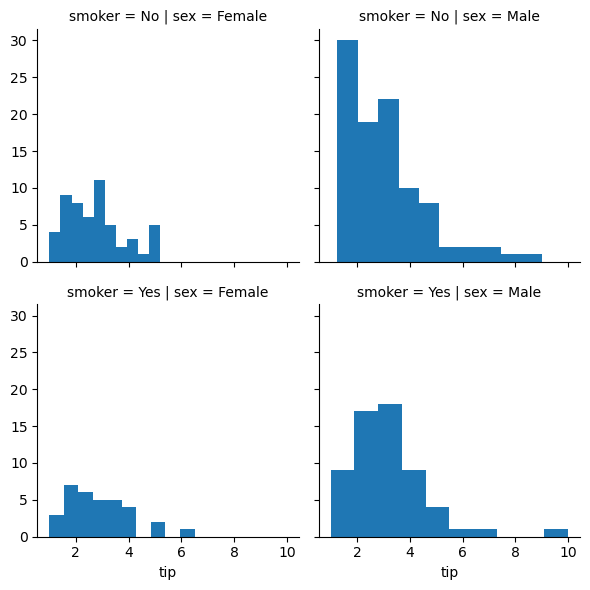

In [23]:
g = sns.FacetGrid(tips_df, col = "sex", row = "smoker")
g.map(plt.hist, "tip")

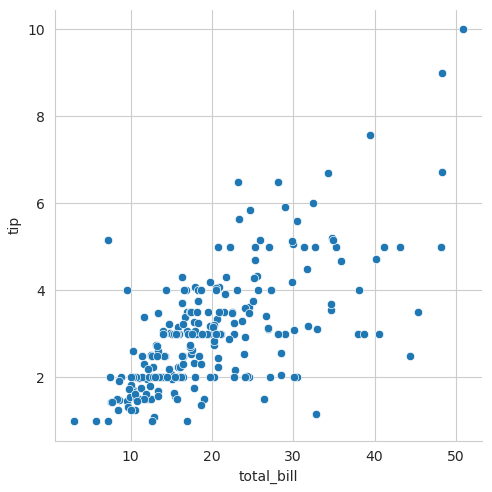

In [24]:
#I am doing a scatterplot to see the relationship between tip and total_bill.
with sns.axes_style(style = "whitegrid"):
    sns.relplot(x = "total_bill", y = "tip", data = tips_df)

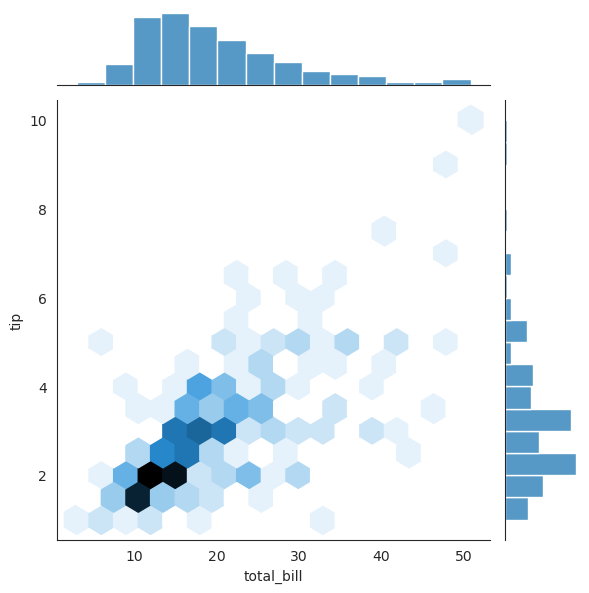

In [25]:
#To look at the data in a different way I will use seaborn.jointplot.
with sns.axes_style("white"):
    sns.jointplot(x = "total_bill", y = "tip", kind = "hex", data = tips_df)

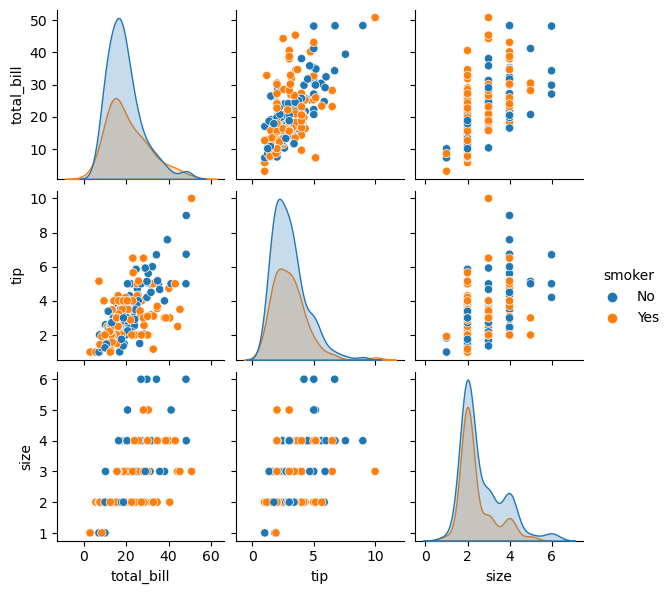

In [26]:
#To identify correlations I will also use seaborn.pairplot.
sns.pairplot(tips_df, height = 2, hue = "smoker")

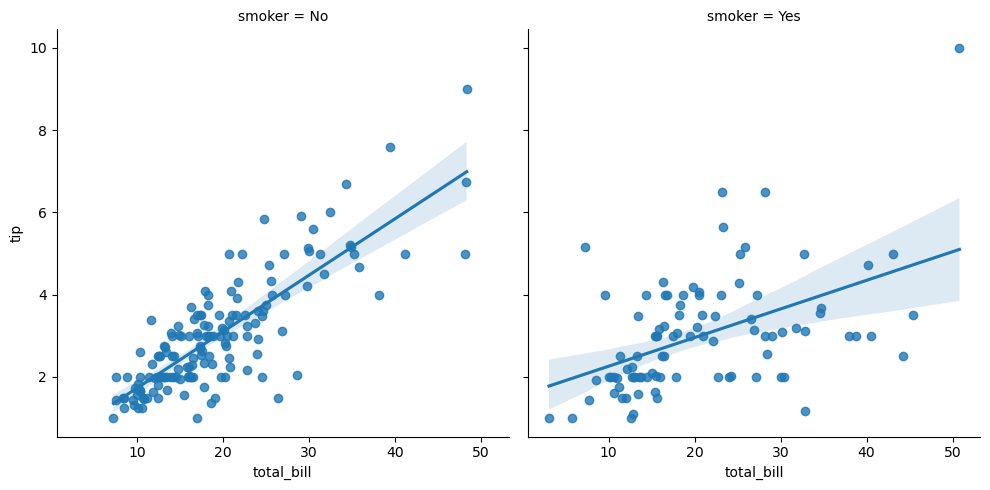

In [27]:
#I will use seaborn.lmplot to graphically read a linear correlation between two columns (tip and total_bill).
sns.lmplot(x = "total_bill", y = "tip", col = "smoker", data = tips_df)